In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics

In [4]:
df=pd.read_csv("GOOGL.csv")

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [6]:
df1=df.copy()
df1.drop('Date',axis=1,inplace=True)

In [7]:
columns=[]
for i in df1.columns:
    columns.append(i)

In [8]:
def outliers(column_name):
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    return(lower_threshold,upper_threshold)

In [9]:
for column in columns:
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    max=len(df1[df1[column].values>upper_threshold])
    min=len(df1[df1[column].values<lower_threshold])
    # print(min,max)
    print(column,min+max/len(df1[column])*100)
    # column=np.array(df[column])
    # column=np.where(column>upper_threshold,upper_threshold,np.where(column<lower_threshold,lower_threshold,column))
    # print(len(column))
    

Open 5.574362446400361
High 5.574362446400361
Low 5.574362446400361
Close 5.574362446400361
Adj Close 5.574362446400361
Volume 7.289550891446626


In [10]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df1=df.copy()

In [12]:
for column in columns:
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    df1[column]=np.where(df1[column]>upper_threshold,upper_threshold,np.where(df1[column]<lower_threshold,lower_threshold,df1[column]))

In [13]:
X=df1.drop(['Date','Close','Adj Close'],axis=1)
y=df1['Close']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
LR=LinearRegression()

In [15]:
LR.fit(x_train,y_train)

LinearRegression()

In [16]:
LR.coef_

array([-5.19616958e-01,  7.38664299e-01,  7.79494031e-01, -9.03426405e-08])

In [17]:
y_pred=LR.predict(x_test)

In [18]:
df3=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [19]:
df3.head(50)

,actual,predicted
1522,235.385391,235.576726
129,97.072075,95.236137
1986,293.298309,293.519183
646,223.318314,223.892633
1728,249.034027,249.063838
3008,800.940002,800.939347
1281,248.748749,248.491002
1543,269.384369,268.599760
1283,249.479477,252.470876
4426,2146.851147,2149.363720


In [20]:
import math

In [21]:
print('mean absolute error',metrics.mean_absolute_error(y_test,y_pred))
print('mean square error',metrics.mean_squared_error(y_test,y_pred))
print('RMSE',math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2 score',metrics.r2_score(y_test,y_pred))

mean absolute error 2.5300020767683042
mean square error 18.273747515861984
RMSE 4.274780405571962
r2 score 0.9999433252321603


In [23]:
l3=np.array([[50,60,48,445667]])

In [24]:
LR.predict(l3)

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57.29657739])

In [25]:
graph=df3.head(20)

<Axes: >

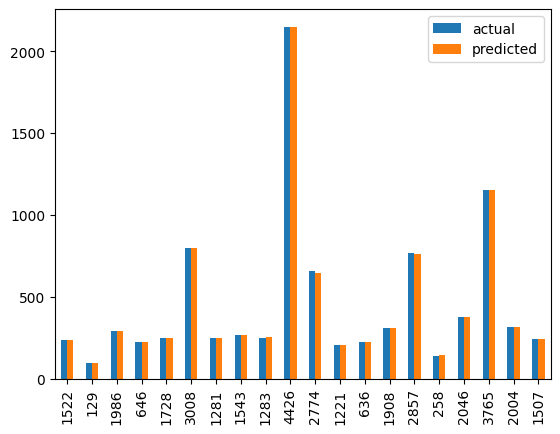

In [27]:
graph.plot(kind='bar')